# サポートベクターマシン（Support Vector Machines）

サポートベクターマシン (SVM)は、サンプル群を上手に分類する境界線を見つけようとする方法です。多クラス分類にも利用可能です。

目次

    Part 1: SVMの原理
    Part 2: カーネル法
    Part 3: その他の資料
    Part 4: scikit-learnでSVM

## Part 1: SVMの原理

まずは、SVMのおおまかな原理を掴んでいきましょう。

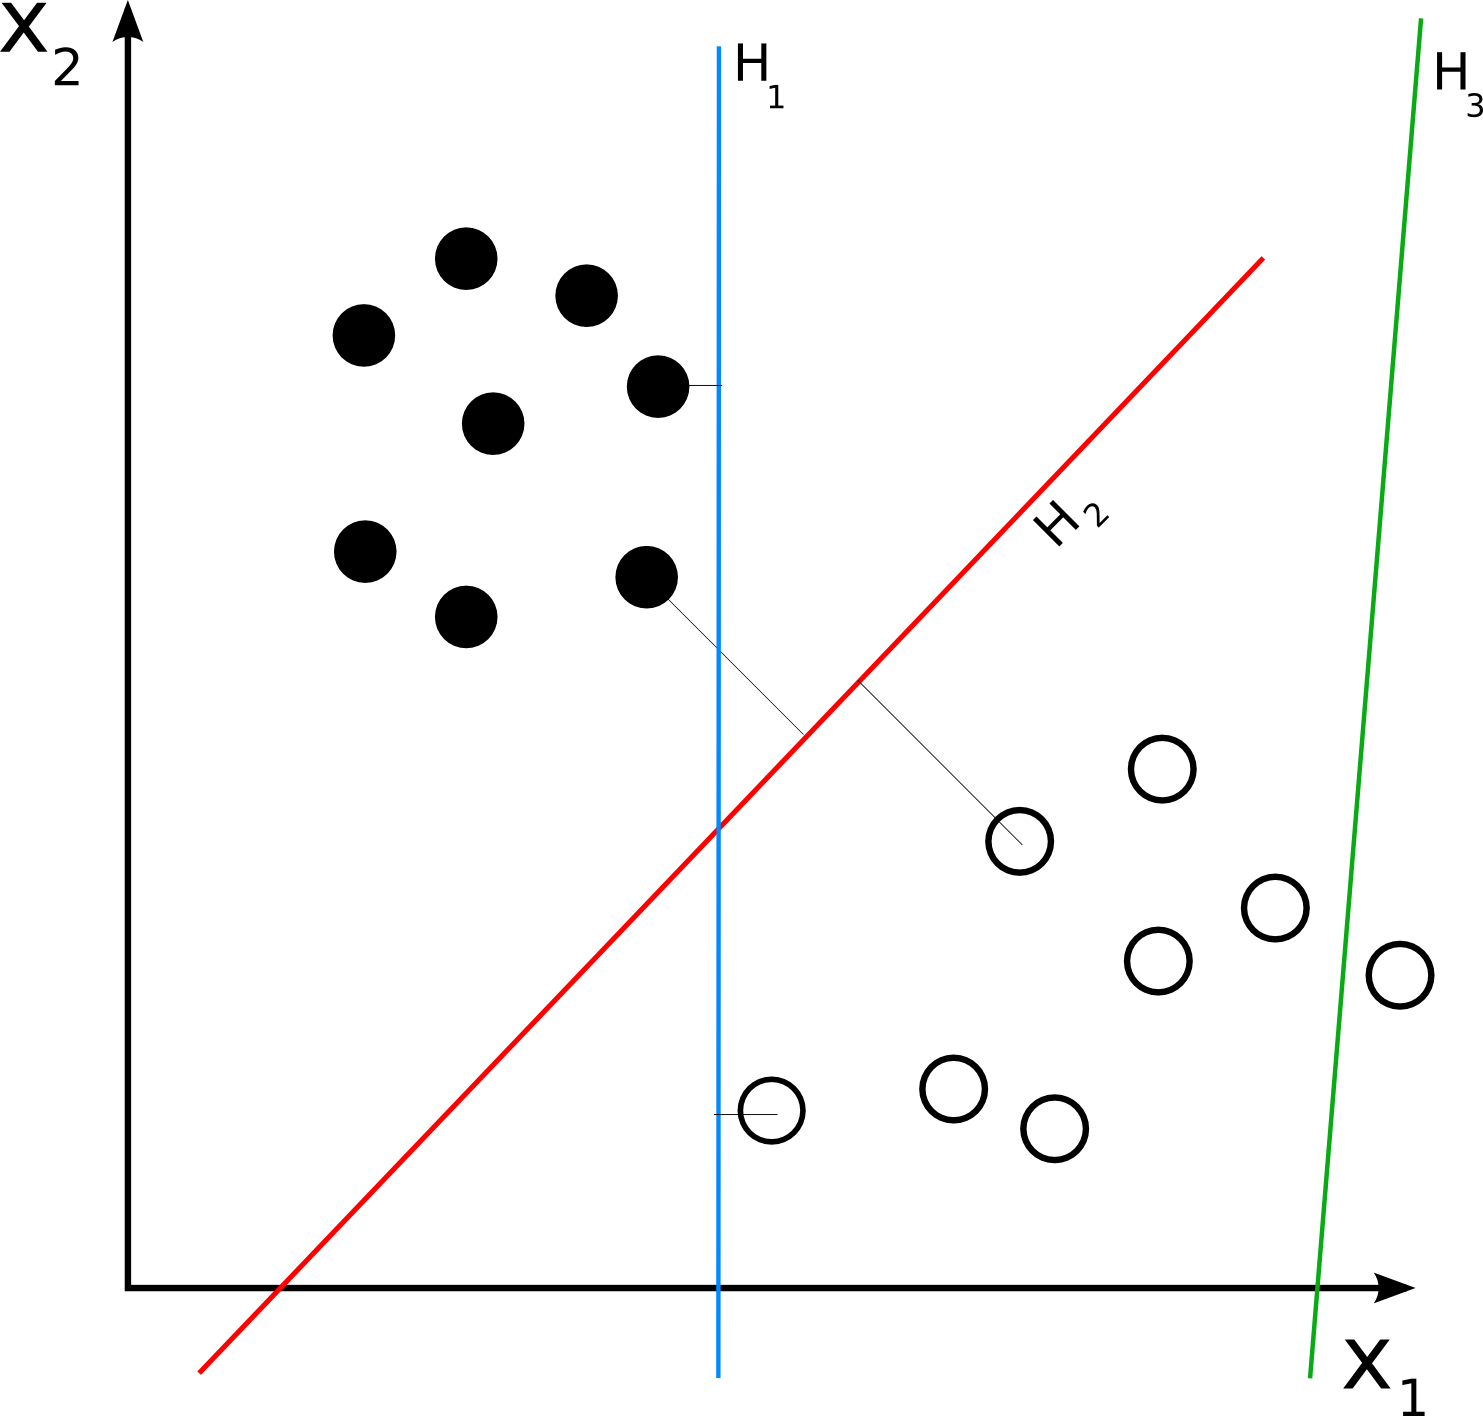

In [3]:
from IPython.display import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/2/20/Svm_separating_hyperplanes.png'
Image(url, width=450)

## Part 2: カーネル法

いつも超平面で分離できるとは限りません。そんな時、役に立つのがカーネル法と呼ばれる、工夫です。

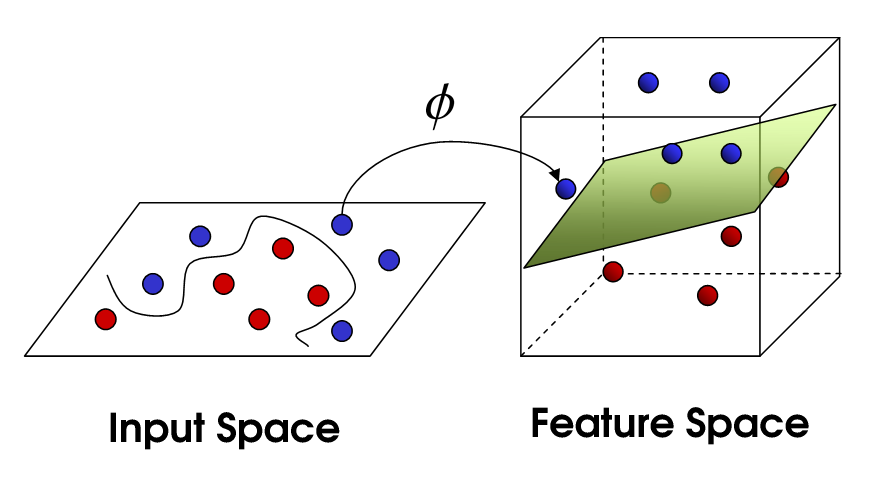

In [4]:
# 特徴量空間におけるカーネルトリック
url='http://i.imgur.com/WuxyO.png'
Image(url)

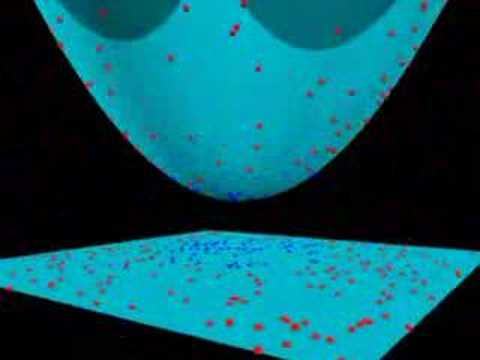

In [5]:
# カーネル法がよく分かる動画です。
from IPython.display import YouTubeVideo
YouTubeVideo('3liCbRZPrZA')

## Part 4: scikit-learnを使ったSVMの実際

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.style.use('seaborn-whitegrid')

In [4]:
from sklearn import datasets

In [5]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

パラメータについて、ドキュメントを参照してみてください。

[SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) (Support Vector Classification) 

[SVM library of Scikit Learn](http://scikit-learn.org/stable/modules/svm.html)


In [6]:
from sklearn.svm import SVC

In [7]:
model = SVC()

In [8]:
from sklearn.cross_validation import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=3)                                                

In [11]:
model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
predicted = model.predict(X_test)

In [14]:
predicted

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0])

In [15]:
from sklearn import metrics

In [16]:
metrics.accuracy_score(Y_test, predicted)

0.97368421052631582

非常に高い予測精度が得られました。

デフォルトでは、RBFカーネルが使われています。

それぞれのカーネルの違いを[scikit-learnのドキュメント](http://scikit-learn.org/stable/modules/svm.html#svm-classification)に詳しく載っています。

これを自分で作る方法を書いておきますので、興味がある方はやってみてください。